#### 경사하강법 (Gradient Descent)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(np.random.rand(5))

[0.87148829 0.28595143 0.9551502  0.77260652 0.07202884]


In [7]:
x = np.random.rand(10)
print(x)
y = 0.5 * x + 0.8
print(y)
print(y.shape)

[0.1599258  0.9789816  0.00364247 0.43699439 0.0987057  0.62312381
 0.35434813 0.84624768 0.91249893 0.59564553]
[0.8799629  1.2894908  0.80182123 1.0184972  0.84935285 1.1115619
 0.97717406 1.22312384 1.25624947 1.09782277]
(10,)


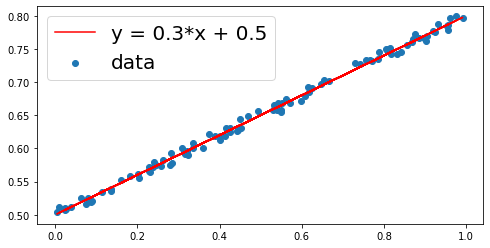

w: 0.3, b: 0.5


In [9]:
# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
     # [균등분포] 최소 0, 최대 1, 개수 1000개
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [14]:
# 최대 반복 횟수
num_epoch = 10

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.09232, b = 0.49788 error = 4.85358
 5 w = 0.16523, b = 0.57202 error = 0.08917
------------------------------------------------------------
 9 w = 0.2, b = 0.6 error = 0.06764


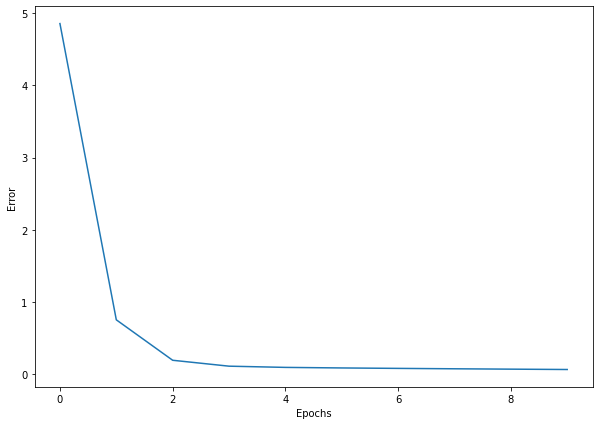

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()